In [1]:
%run import_modules.py
%matplotlib inline

### 1. Read Data

In [2]:
# 학습용과 제출용 데이터를 읽어들인다.
train = pd.read_csv('X_train.csv', encoding='cp949')
test = pd.read_csv('X_test.csv', encoding='cp949')

# 전처리를 동일하게 적용하기 위해 두 데이터를 합한다.
train_test = pd.concat([train, test])

# 학습용 정답 데이터를 읽는다. 전처리 후 학습용과 제출용 데이터를 분리하기 위해 ID를 보관한다.
y_train = pd.read_csv('y_train.csv', encoding='cp949').GENDER.map({'남':0, '여':1})
IDtest = np.sort(test['CUS_ID'].unique())

# garbage collection
del train, test
gc.collect()

train_test

,CUS_ID,총페이지뷰,평균페이지뷰,접속종류_사이트,접속종류_소분류,접속종류_중분류,접속종류_대분류,이용일수,이용주기,이용률_주말,...,정보통신/IT,정치/행정,제조,커뮤니티,학문,최근1개월_이용시간,최근1개월_이용건수,최근3개월_이용시간,최근3개월_이용건수,주이용사이트
0,1,13656.0,4.0,201,91,52,16,205,1,0.242812,...,0,14,0,78843,0,26097.0,387.0,38113.0,545.0,종합포털
1,2,25498.0,5.0,573,182,90,20,105,3,0.011271,...,4963,665,966,74538,0,119868.0,739.0,323884.0,2075.0,포털검색
2,3,10413.0,5.0,270,96,53,17,105,2,0.071173,...,427,846,217,11175,0,NaN,NaN,NaN,NaN,종합포털
3,4,12831.0,7.0,166,85,50,17,107,1,0.107270,...,2041,3117,522,65843,0,NaN,NaN,NaN,NaN,종합포털
4,5,13267.0,3.0,328,139,73,20,151,2,0.110738,...,538,11491,47,38769,188,NaN,NaN,24523.0,286.0,종합포털
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,4996,17627.0,8.0,208,107,59,17,132,2,0.010652,...,1618,3038,384,8260,0,11083.0,52.0,47394.0,189.0,종합포털
2496,4997,8366.0,7.0,194,104,64,19,112,3,0.291469,...,132,1553,910,122403,0,1568.0,17.0,12261.0,124.0,종합포털
2497,4998,2253.0,5.0,67,45,34,14,113,1,0.434322,...,230,0,259,4131,0,NaN,NaN,NaN,NaN,게임포털
2498,4999,7904.0,5.0,169,91,49,18,166,1,0.212892,...,3944,254,793,12455,0,19707.0,130.0,49589.0,476.0,종합포털


### 3. Feature Engineering

*Encode Categorical Variables*

In [3]:
# 범주형 변수와 수치형 변수를 분리
cat_features = list(train_test.select_dtypes(include=['object']).columns)
num_features = [c for c in train_test.columns.tolist() if c not in cat_features]

# 결측값 처리
train_test[cat_features] = train_test[cat_features].fillna('None')
train_test[num_features] = train_test[num_features].fillna(0)

# 범주형 변수에 One-Hot-Encoding 후 수치형 변수와 병합
if len(cat_features) > 0:
    train_test = pd.concat([train_test[num_features], pd.get_dummies(train_test[cat_features])], axis=1)

train_test    

,CUS_ID,총페이지뷰,평균페이지뷰,접속종류_사이트,접속종류_소분류,접속종류_중분류,접속종류_대분류,이용일수,이용주기,이용률_주말,...,주이용사이트_포털동영상,주이용사이트_포털만화,주이용사이트_포털모바일,주이용사이트_포털부동산,주이용사이트_포털블로그,주이용사이트_포털어린이,주이용사이트_포털증권,주이용사이트_포털커뮤니티,주이용사이트_헤어/미용쇼핑몰,주이용사이트_헬스보충제쇼핑몰
0,1,13656.0,4.0,201,91,52,16,205,1,0.242812,...,0,0,0,0,0,0,0,0,0,0
1,2,25498.0,5.0,573,182,90,20,105,3,0.011271,...,0,0,0,0,0,0,0,0,0,0
2,3,10413.0,5.0,270,96,53,17,105,2,0.071173,...,0,0,0,0,0,0,0,0,0,0
3,4,12831.0,7.0,166,85,50,17,107,1,0.107270,...,0,0,0,0,0,0,0,0,0,0
4,5,13267.0,3.0,328,139,73,20,151,2,0.110738,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,4996,17627.0,8.0,208,107,59,17,132,2,0.010652,...,0,0,0,0,0,0,0,0,0,0
2496,4997,8366.0,7.0,194,104,64,19,112,3,0.291469,...,0,0,0,0,0,0,0,0,0,0
2497,4998,2253.0,5.0,67,45,34,14,113,1,0.434322,...,0,0,0,0,0,0,0,0,0,0
2498,4999,7904.0,5.0,169,91,49,18,166,1,0.212892,...,0,0,0,0,0,0,0,0,0,0


*Normalize Features & Reduce Dimension*

In [4]:
# 왼쪽으로 치우진 분포를 정규분포로 바꾸기 위해 로그 변환을 수행한다.
train_test.iloc[:,1:] = np.log1p(train_test.iloc[:,1:])

# 특성 차원이 너무 많을 경우 과적합이 발생하기 때문에 차원 축소를 실행한다.
#max_d = num_d = bow.shape[1] - 1
#pca = PCA(n_components=max_d, random_state=0).fit(bow.iloc[:,1:])
#cumsum = np.cumsum(pca.explained_variance_ratio_) #분산의 설명량을 누적합
#num_d = np.argmax(cumsum >= 0.99) + 1             # 분산의 설명량이 99%이상 되는 차원의 수
#if num_d == 1: num_d = max_d
#pca = PCA(n_components=num_d, random_state=0).fit_transform(bow.iloc[:,1:])
#bow = pd.concat([bow.iloc[:,0], pd.DataFrame(pca)], axis=1)

# 전처리 후 학습용과 제출용 데이터로 분리한다.
train_x = train_test.query('CUS_ID not in @IDtest').drop('CUS_ID', axis=1)
test_x = train_test.query('CUS_ID in @IDtest').drop('CUS_ID', axis=1)

*Check feature importance*

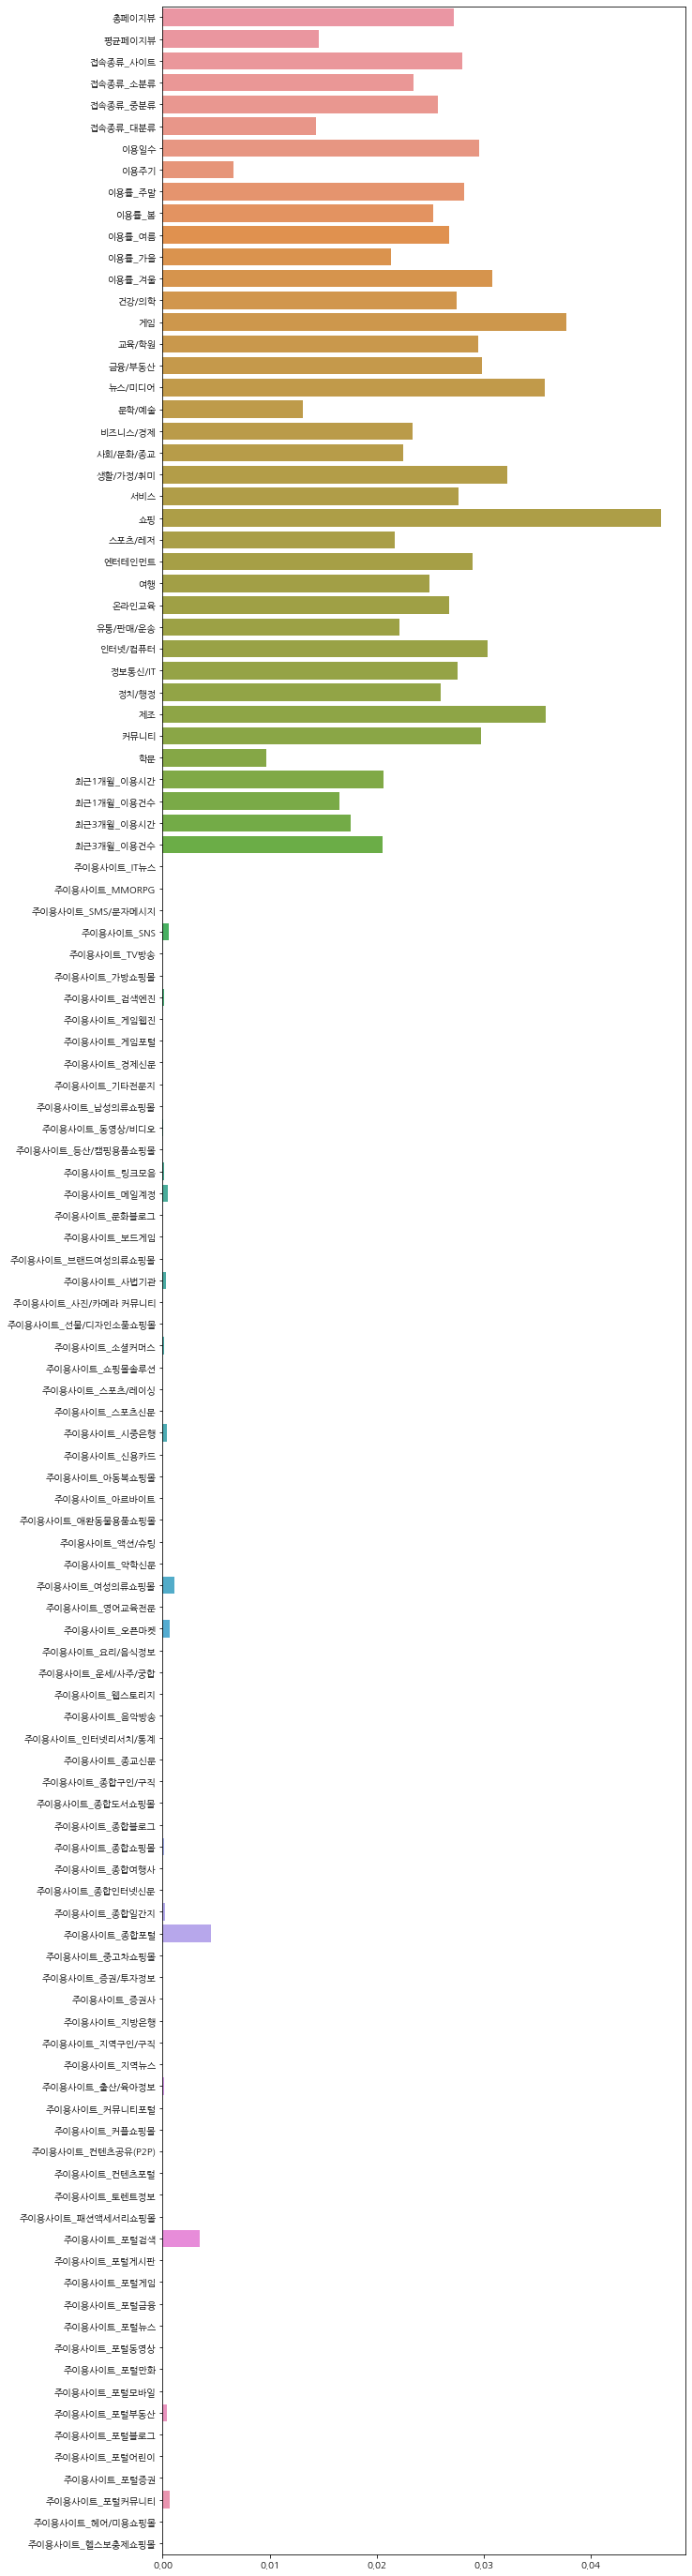

In [5]:
# 차트에서 한글 출력을 위한 설정
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

clf = RandomForestClassifier(random_state=0).fit(train_x, y_train)
plt.figure(figsize=(10,50))
f = sns.barplot(x=clf.feature_importances_, y=train_x.columns)
plt.show()

*Select Features*

100%|██████████| 95/95 [00:27<00:00,  3.48it/s]

(50, 0.7539238375694246)


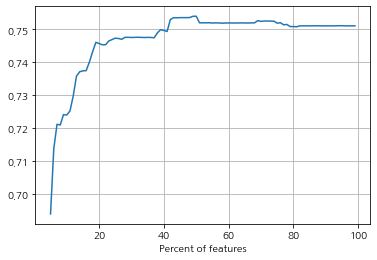

In [6]:
model = LogisticRegression(random_state=0)

# 각 특성과 타깃(class) 사이에 유의한 통계적 관계가 있는지 계산하여 특성을 선택하는 방법 
cv_scores = []
for p in tqdm(range(5,100,1)):
    X_new = SelectPercentile(percentile=p).fit_transform(train_x, y_train)    
    cv_score = cross_val_score(model, X_new, y_train, scoring='roc_auc', cv=5).mean()
    cv_scores.append((p,cv_score))

# Print the best percentile
best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

In [7]:
# 과적합을 피하기 위해 최적의 p값 주변의 값을 선택하는게 더 나은 결과를 얻을 수 있다. 
selectp = SelectPercentile(percentile=best_score[0]).fit(train_x, y_train)
X_train_sel = selectp.transform(train_x)
X_test_sel = selectp.transform(test_x)

### 4. Model Tuning (Hyperparameter Optimization)

In [8]:
# 학습데이터 70%, 평가데이터 30%로 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X_train_sel, y_train, test_size=0.3, random_state=0)

In [9]:
clfs = [
   (
        KNeighborsClassifier(),              # 사용하려는 모델
        {'n_neighbors': [3,5,7,9,11],        # 최적화하려는 하이퍼파라미터
         'weights': ['uniform','distance']}
    ),
    (
        MLPClassifier(random_state=0),
        {'batch_size': [32, 64, 128],
         'learning_rate' : ['constant', 'adaptive'],
         'activation': ['tanh', 'relu'],
         'solver': ['sgd', 'adam']}
    ),
    (
        LogisticRegression(random_state=0),  
        {'C': np.arange(0.1, 1.1, 0.1),      
         'penalty': ['l1','l2']}
    ),
    (
        RandomForestClassifier(random_state=0),
        {'n_estimators': [100,200,300],
         'max_depth': [3,4,5],}
        # 'max_features': (np.arange(0.5, 1.0, 0.1)*X_train.shape[1]).astype(int)}
    ),
    (
        GradientBoostingClassifier(random_state=0),
        {'n_estimators': [100, 200, 300],
         'learning_rate': [1, 0.1, 0.01],}
        # 'max_features': (np.arange(0.5, 1.0, 0.1)*X_train.shape[1]).astype(int)}
    ),
    (
        XGBClassifier(tree_method = 'hist', random_state=0),
        {'min_child_weight': range(0, 121, 20),
         'learning_rate': np.arange(0.1, 0.6, 0.1),
         'subsample': np.arange(0.5, 1.0, 0.1)}
    ),
    (
        LGBMClassifier(random_state=0),
        {'min_child_weight': range(0, 121, 20),
         'learning_rate': np.arange(0.1, 0.6, 0.1),
         'subsample': np.arange(0.5, 1.0, 0.1)}
    ),
]

clfs_tuned = []  # 튜닝된 모델을 저장
for clf, param_grid in tqdm(clfs):
    start = time.time()
    rand_search = RandomizedSearchCV(clf, param_grid, n_iter=5, scoring='roc_auc', 
                                     cv=3, random_state=0, n_jobs=-1)
    rand_search.fit(X_train, y_train)
    clf_name = type(clf).__name__
    clf_score = rand_search.score(X_valid, y_valid)
    print('{:30s} {:30f} {:.1f}'.format(clf_name, clf_score, time.time() - start))
    clfs_tuned.append((clf_name, rand_search, clf_score))

 14%|█▍        | 1/7 [00:01<00:10,  1.68s/it]

KNeighborsClassifier                                 0.648173 1.7


 29%|██▊       | 2/7 [00:10<00:19,  3.82s/it]

MLPClassifier                                        0.711940 8.8


 43%|████▎     | 3/7 [00:13<00:14,  3.71s/it]

LogisticRegression                                   0.722363 3.4


 57%|█████▋    | 4/7 [00:15<00:09,  3.20s/it]

RandomForestClassifier                               0.701404 2.0


 71%|███████▏  | 5/7 [00:19<00:06,  3.27s/it]

GradientBoostingClassifier                           0.686704 3.4


 86%|████████▌ | 6/7 [00:20<00:02,  2.57s/it]

XGBClassifier                                        0.706212 1.0


100%|██████████| 7/7 [00:20<00:00,  2.96s/it]

LGBMClassifier                                       0.697808 0.4


### 5. Model Ensemble

*Correlation between models*

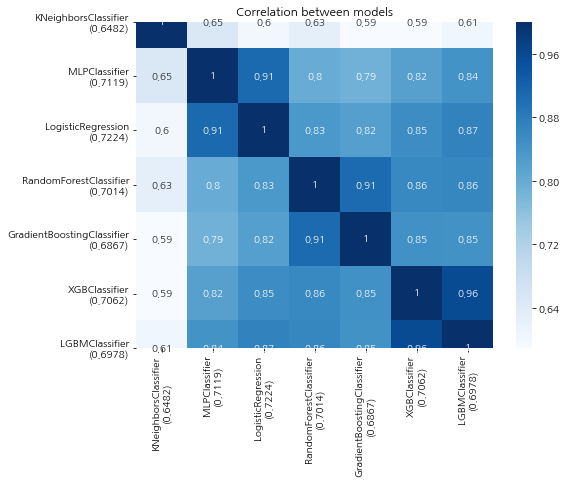

In [10]:
pred_results = []
for name, clf, clf_score in clfs_tuned:
    pred = clf.predict_proba(X_valid)[:,1]
    name = f'{name}\n({clf_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results = pd.concat(pred_results, axis=1)

# 모형의 예측값 간의 상관관계를 보기 위해 hitmap을 도식한다.
plt.figure(figsize = (8,6))
g = sns.heatmap(ensemble_results.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

*Averaging Ensemble*

In [11]:
# Averaging 앙상블에 사용하지 않을 모델은 주석 처리하세요.
selected = [
    'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',    
    'XGBClassifier',
    'LGBMClassifier',
]
models_for_ensemble = [clf for clf in clfs_tuned if clf[0] in selected]

In [12]:
max_score = 0
for p in tqdm([0, 1, 2.56]):  # p==1:산술평균, p=0:기하평균, 그 외:멱평균(주의:멱평균은 과적합 가능성이 높음)
    for i in range(2, len(models_for_ensemble)+1):
        for models in combinations(models_for_ensemble, i):
            if p == 0:
                pred_mean = gmean([clf.predict_proba(X_valid)[:,1] for name, clf, _ in models], axis=0)
            else:
                preds = [clf.predict_proba(X_valid)[:,1] for name, clf, _ in models]
                pred_mean = (np.sum(np.array(preds)**p, axis=0) / len(models))**(1/p)
            score = roc_auc_score(y_valid, pred_mean)
            if max_score < score:
                best_avg_ensemble = (p, models, score)
                max_score = score

p, models, score = best_avg_ensemble
print('p={}\n{}\n{}'.format(p, '●'.join([clf_name for clf_name, _, _ in models]), score))

100%|██████████| 3/3 [00:24<00:00,  8.22s/it]

p=0
LogisticRegression●RandomForestClassifier
0.72403840401986


*Stacking*

In [13]:
from vecstack import StackingTransformer

# Initialize 1st level estimators
# 사용하지 않을 모델은 주석 처리하세요.
selected = [
    'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',    
    'XGBClassifier',
    'LGBMClassifier',
]
estimators = [(name, clf) for name, clf, _ in clfs_tuned if name in selected]
              
# Initialize StackingTransformer
stack = StackingTransformer(estimators, regression=False, needs_proba=True, metric=None,
                            n_folds=3, stratified=True, shuffle=True, random_state=0)

# Fit
stack = stack.fit(X_train, y_train)

# Get your stacked features
S_train = stack.transform(X_train)
S_valid = stack.transform(X_valid)
S_test = stack.transform(X_test_sel)

# Use 2nd level estimator with stacked features
meta_model = LogisticRegression().fit(S_train, y_train)
print(roc_auc_score(y_valid, meta_model.predict_proba(S_valid)[:,1]))  

0.7229093138721062


### 6. Deployment

In [14]:
# Apply the best averaging ensemble model to Unseen Data
if p == 0:
    pred_mean = gmean([clf.predict_proba(X_test_sel)[:,1] for name, clf, _ in models], axis=0)
else:
    preds = [clf.predict_proba(X_test_sel)[:,1] for name, clf, _ in models]
    pred_mean = (np.sum(np.array(preds)**p, axis=0) / len(models))**(1/p)
pd.DataFrame({'CUS_ID': IDtest, 'GENDER': pred_mean}).to_csv('submission_avg.csv', index=False)

# Apply the stacking model to Unseen Data
pd.DataFrame({'CUS_ID': IDtest, 'GENDER': meta_model.predict_proba(S_test)[:,1]}).to_csv('submission_stk.csv', index=False)

## End